Confusion Matrix:
 [[134  12]
 [ 22 132]]


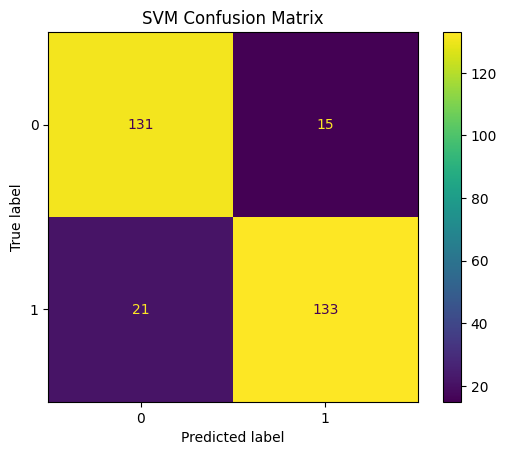

Accuracy: 0.887
Precision: 0.888
Recall: 0.887
F1-score: 0.887

Classification Report:
               precision    recall  f1-score   support

           0      0.859     0.918     0.887       146
           1      0.917     0.857     0.886       154

    accuracy                          0.887       300
   macro avg      0.888     0.887     0.887       300
weighted avg      0.889     0.887     0.887       300

AUC:  0.9553015477673013


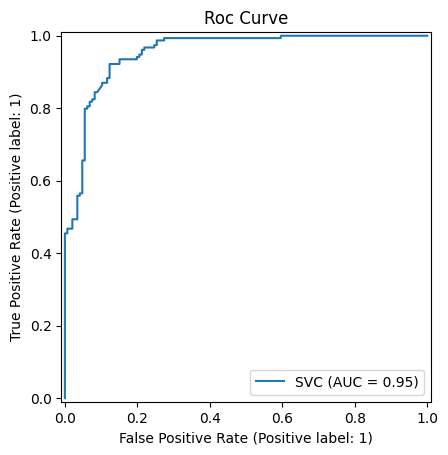

In [13]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score, RocCurveDisplay
)
import matplotlib.pyplot as plt

iris = load_iris()
iris.data , iris.target = make_classification(n_samples=1000,n_features=5,n_classes=2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_svm = SVC(kernel='linear', C=1.0, probability=True , gamma=0.5, random_state=42)  # change kernel, C, gamma here, rememeber probability param
clf_svm.fit(X_train_scaled, y_train)

y_pred = clf_svm.predict(X_test_scaled)
y_scores = clf_svm.predict_proba(X_test_scaled)[:,1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
ConfusionMatrixDisplay.from_estimator(clf_svm,X_test,y_test)
plt.title("SVM Confusion Matrix")
plt.show()
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

auc = roc_auc_score(y_test,y_scores)
print("AUC: ",auc)
RocCurveDisplay.from_estimator(clf_svm,X_test,y_test)
plt.title("Roc Curve")
plt.show()


